# Лабораторная работа 1
# Траектория движения тела. Графики функций

Шпак Андрей Валерьевич, 15.07.2022

## Задание 1.1. (Траектория движения тела)

Тело запущено под углом $\alpha$ к горизонту на высоте $h_{start}$ и через время $t=T$ достигает другое тело, расположенное на расстоянии $s_{end}$ и высоте $h_{end}$. Начальный момент времени движения тела полагаем равным нулю $t=0$.

Движение запущенного тела осуществляется только под действием силы тяжести
$$\textbf{F}=m(0,-g),$$ 
где $m$ &mdash; масса тела, $g$ &mdash; ускорение свободного падения.

Тело будем считать материальной точкой массы $m$. Начальный момент времени движения тела полагаем равным нулю $t=0$. Сопротивлением среды пренебрегаем.

$\color{red}{Определите}$ функцию перемещения тела $\left( s_{x}\left( t \right), s_{y} \left( t \right) \right)$ под действием силы тяжести, где $\left( s_{x}\left( t \right), s_{y} \left( t \right) \right)$ &mdash; горизонтальная и вертикальная составляющая положения тела в момент времени t, соответственно.

$\color{red}{Найдите}$ угол запуска тела $\alpha$.

$\color{red}{Постройте}$ график траектории движения тела $\left( s_{x}\left( t \right), s_{y} \left( t \right) \right)$ для $t \in [0,T]$

Выполните задание при $h_{start}=10$ m,$T=2.5s,s_{end}=55$ m, $h_{end}=12 $m, $g \approx 9.807$ $m / s^2.$

$\textbf{Комментарии:}$
* Не знаю, как в Латехе сделать дробь типа $$m / s^2.$$

## Реализация Задания 1.1 
## Этап 1. Подключения модулей

In [4]:
import math

In [5]:
math.sin(math.pi/2)

1.0

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const
import sympy

In [10]:
g=const.g
g

9.80665

In [11]:
const.unit('standard acceleration of gravity')

'm s^-2'

## Этап 2. Определение переменных

In [12]:
h_start = 10 # вертикальная составляющая положения тела в момент запуска
T = 2.5 # время полета
s_end = 5.5e1 # горизонтальное перемещение тела за время полета
h_end = 1.2E+1 # вертикальная составляющая положения тела в конечный момент движения
g = 9.807 # ускорение свободного падения
vars = h_start, T, s_end, h_end, g

In [13]:
[type(x) for x in vars] # синтаксис спискового включения для создания списка
# ВОПРОС: что такое int и float в выводе? Сами по себе типы? Или же это строки, как было бы в других языках программирования?
# Склоняюсь к тому, что это имеено объекты - встроенные типы сами по себе

[int, float, float, float, float]

In [14]:
g # переменная не отобразится
vars # переменная отобразится

(10, 2.5, 55.0, 12.0, 9.807)

In [15]:
print(g, vars, T)

9.807 (10, 2.5, 55.0, 12.0, 9.807) 2.5


In [38]:
step = 0.01
t_list = [0 + i * step for i in range(int(T/0.01))]
# здесь я создал список - по секундам с шагом 0.01 с помощью списка для переменной времени T
t_array = np.arange(0, T, step)
# на основе массива из расширения numpy
# интервалы получились полуоткрытые, включающие начало, исключающие конец
type(t_list), type(t_array)

(list, numpy.ndarray)

In [20]:
len(t_list), len(t_array)

(250, 250)

In [27]:
# после создания списка, его размер изменить можно, после создания массива - нельзя
t_list.append(t_list[-1] + step)
len(t_list)

251

## Этап 3. Аналитический вид функции перемещения

Помещаю начало прямоугольной декартовой системы координат на уровне земли, тогда в начальный момент движения тела $t = 0$ имею 
$$s_x \left( 0 \right) = 0,$$ 
$$s_y \left( 0 \right) = h_{start}.$$ 
Для построения функции перемещения 
$\left( s_{x}\left( t \right), s_{y} \left( t \right) \right)$ 
воспользуюсь вторым законом Ньютона 
$$m \textbf{a} = \textbf{F},$$ 
где $m$ &mdash; масса тела, ускорение движения тела 
$\textbf{a} = \left( s_{x}^"\left( t \right), s_{y}^" \left( t \right) \right)$ 
и приложенная сила 
$\textbf{F} = m \left( 0, -g \right)$. 
Приравняв силы $\textbf{F}$, в результате имеем, что 
$$s_{x}^"\left( t \right) = 0$$ 
$$s_{y}^"\left( t \right) = -g.$$
На основании уравнений можно записать аналитический вид для функций $s_{x}\left( t \right)$ и $s_{y} \left( t \right)$

$\textbf{По формуле координаты перемещения:}$ $x_0 + v 0_{x} t + \dfrac{a_x}{2} t^2$
$$s_{x}\left( t \right) = s_{x}\left( 0 \right) + v 0_{x} t = 0 + v 0_{x} t,$$
$$s_{y}\left( t \right) = s_{y}\left( 0 \right) + v 0_{x} t - \dfrac{g}{2} t^2 = h_{start} + v 0_{x} t - \dfrac{g}{2} t^2,$$
где $\textbf{v0} = \left( v0_x, v0_y \right)$ обозначает неизвестную скорость движения тела в начальный момент времени $t = 0.$

Из заданного соотношения нахожу $s_x \left( T \right) = s_{end}$ находим значение для $v0_x$

In [34]:
v0_x = s_end / T
v0_x

22.0

Из заданного соотношения нахожу $s_y \left( T \right) = h_{end}$ находим значение для $v0_y$

In [35]:
v0_y = (h_end - h_start + g / 2 * T ** 2) / T
v0_y

13.05875

Значение угла $\alpha$ определяю из соотношения $\tan \alpha = \dfrac{v0_y}{v0_x}$

In [37]:
alpha = math.atan(v0_y / v0_x)
alpha, math.degrees(alpha)

(0.53568520293127, 30.692501275570805)

## Этап 4. График функции перемещения

In [40]:
# списки чисел, соответствующие горизонтальным и вертикальным составляющим положения тела в момент времени t
s_x_list = [v0_x * t for t in t_list]
s_y_list = [h_start + v0_y * t - g * t ** 2 / 2 for t in t_list]

In [41]:
# массивы чисел, соответствующие горизонтальным и вертикальным составляющим тела в момент времени t
s_x_array = v0_x * t_array
s_y_array = h_start + v0_y * t_array - g * t_array ** 2 /2

(0.0, 55.0, 0.0, 22.0)

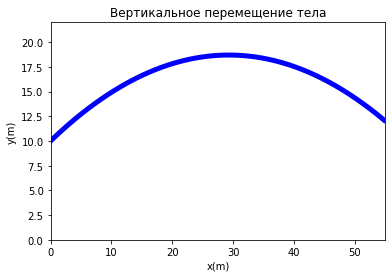

In [46]:
plt.figure()
plt.plot(s_x_list, s_y_list, 'b-', lw = 5)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x(m)'); plt.ylabel('y(m)') #символ ; позволяет записывать несколько выражений 
plt.axis([0, s_end, 0, h_end + 10])
# альтернативный синтаксис для установки пределов по осям:
# plt.xlim(0, s_end)
# plt.ylim(0, h_end + 10)

## Задание 1.2. (Графики функций в полярной и декартовой системах координат)

$\color{red}{Постройте}$ графики функций по координатам точек согласно варианту. Функция задана:

а) в полярной системе координат $\left( \varphi, \rho \right)$ полярным уравнением $\rho = \rho \left( \varphi \right)$;

б) в декартовой системе координат $\left( x, y \right)$ параметрическими уравнениями $\mathit{x} = x \left( t \right)$, $y = y \left( t \right)$.

1. а) $\textit{Декартов лист}$ $\rho = \dfrac{3a \sin{\varphi} \cos{\varphi}}{\sin^3 \varphi + \cos^3 \varphi}, a \in \mathbb{R}$

   б) $x = \dfrac{3t^2 + 1}{3t^3}, y = \sin \left( \dfrac{t^3}{3} + t \right)$

$\textbf{Комментарии:}$

## Задание 1.3. (Секущая и касательная к заданной функции)

$\color{red}{Постройте}$ в одной графической области
* график движения тела $(s_{x}(t),s_{y}(t))$ для $t \in [0,T]$,
* график секущей прямой, проходящей через начальную и конечную точки траектории движения тела,
* график касательной прямой к траектории движения тела в начальный момент времени

## Задание 1.4. (Определение времени, когда запущенное тело коснется земли)

Для задачи о падении тела определите время касания телом земли (время нахождения тела в воздухе).
$\color{red}{Реализацию осуществите двумя способами.}$
1. $\textbf{Точное решение:}$ время касания находится из решения квадратного уравнения $s_y \left( t \right) = 0;$
2. $\textbf{Приближенное решение:}$
    * Постройте последовательность $s_y$ на временное отрезке $\left[ 0, t_{stop} \right]$, чтобы момент касания тела земли $t^*$ попадал в выбранный отрезок $t^* \in \left[ 0, t_{stop} \right]$. Отметим, что $t_{stop}>T$.
    * Найдите в построенной последовательности $s_y$ два соседних элемента последовательности, значения которых меняют знак, т. е. $s_y \left[ k \right] s_y \left[ k + 1 \right] < 0$. Это означает, что $0 \in \left( s_y \left[ k \right], s_y \left[ k + 1 \right] \right)$.
    * Осуществите линейную интерполяцию по двум точкам $\left( t \left[ k \right], s_y \left[ k \right] \right)$ и $\left( t \left[ k + 1 \right], s_y \left[ k + 1 \right] \right)$ для нахождения времени $t^* \in \left( t \left[ k \right], t \left[ k + 1\right] \right)$ из условия $s_y \left( t^* \right) \approx 0$. Другими словами, по координатам двух точек необходимо построить отрезок и найти на этом отрезке координаты точки $ \left( t^*, 0 \right)$.
    
$\color{red}{Сравните}$ точное решение (решение квадратного уравнения) и приближенное решение $t^*$.